## Data Exploration and Demonstration of Main Functionalities

This is the notebook to explore the format of input date and to demonstrate the main functionalities of our sample data analytics script.

The input data is downloaded from World Bank Data [https://data.worldbank.org/]. It contains yearly CO2 emission data of all countries between 1990 and 2014. There are missing data for certain countries in certain years. The data is stored as CSV file with each row represents a year and each column represent a country. 

Below is sample showing only a few years and a few countries:
    
|year| Afghanistan| Albania|Algeria|
|---|---|---|---|
|1990|	2614.571|	5515.168|	76970.33|
|1991|	2438.555|	4286.723|	79049.519|
|1992|	1393.46|	2515.562|	80138.618|
|1993|	1345.789|	2335.879|	82210.473|
|1994|	1294.451|	1925.175|	86416.522|
|1995|	1243.113|	2086.523|	95294.329|
|1996|	1177.107|	2016.85|	97098.493|
|1997|	1096.433|	1543.807|	87340.606|
|1998|	1041.428|	1752.826|	106999.393|

###  We aim to do the fllowing plot and analysis:

1. Plot the original data of selected countries as line chart
2. Plot the annul growth rate of selected countries as line chart
3. Plot the percentage contribution to overall CO2 emission of selected countries as area chart

### Python packages used in this script
* `csv` to read in CSV file
* `matplotlib` to do basic plotting

### Script Walk Through

The first cell imports all necessary modules;  read the csv file using `csv` modlue and save the data as a list of Dictionaries.
The csv module does not perform type conversion by default, all data would be treated as string. The data in the first row is displayed as temporary output. It is worth noting that:

* All numbers are stored as string (indicated by the quote around them)
* There are missing values and they are treated as empty string `''`, for instance `('Armenia', '')`


In [8]:
%matplotlib inline
import csv,os
from matplotlib import pyplot as plt

# read data and put it in a list of dictionaries.
data_path = 'data'
data_file_name = 'co2_emission.csv'
file = os.path.join(data_path,data_file_name)

data=[]
with open(file, 'r') as csvfile:
    dict_reader = csv.DictReader(csvfile,delimiter=',')
    for dict_row in dict_reader:
        data.append(dict_row)
data[0]

OrderedDict([('year', '1990'),
             ('Afghanistan', '2614.571'),
             ('Albania', '5515.168000000001'),
             ('Algeria', '76970.33'),
             ('American Samoa', ''),
             ('Andorra', '407.037'),
             ('Angola', '5115.465'),
             ('Antigua and Barbuda', '282.35900000000004'),
             ('Arab World', '671736.0621652771'),
             ('Argentina', '112147.86099999999'),
             ('Armenia', ''),
             ('Aruba', '1639.149'),
             ('Australia', '263704.971'),
             ('Austria', '57685.577000000005'),
             ('Azerbaijan', ''),
             ('Bahamas, The', '1950.844'),
             ('Bahrain', '12427.463'),
             ('Bangladesh', '15533.412'),
             ('Barbados', '1074.431'),
             ('Belarus', ''),
             ('Belgium', '106049.64'),
             ('Belize', '311.695'),
             ('Benin', '707.7310000000001'),
             ('Bermuda', '502.379'),
             ('Bhutan', '128.345

The following cell sorts the rows by the `year` value ascendingly. It extracts `year` data to be saved as a list of integers. This will be used as the X-axis values for plotting. It then extracts data belonging to three countries: India, China and USA. The extracted data are converted to `float`  type and saved in three lists, each representing a country. 

They are plotted as three lines with given colors.

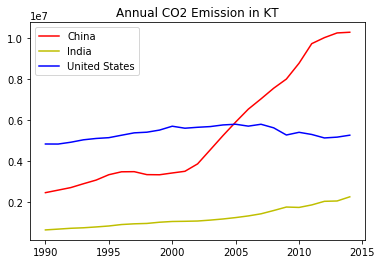

In [3]:
# sort data by year, in case the file is not in year order
data_sorted_by_year = sorted(data, key=lambda k: k['year']) 

#extract the year data
year = [int(row['year']) for row in data]

#Extract the raw data for three countries

india = [float(row['India']) for row in data_sorted_by_year] 
china = [float(row['China']) for row in data_sorted_by_year] 
usa = [float(row['United States']) for row in data_sorted_by_year] 

# plot the raw data

plt.plot(year, china, 'r', year, india,'y', year, usa,'b')
plt.legend(['China','India','United States'])
plt.title("Annual CO2 Emission in KT")

The following cell computes the annual growth rate of the three countries and plot them 

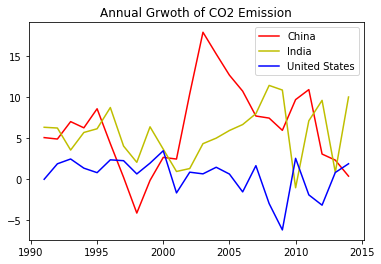

In [4]:
#find out the annual growth rate of China, India and USA
india_annual_growth = [100.0 * g2 / g1 - 100 for g1, g2 in zip(india,india[1:])]
china_annual_growth = [100.0 * g2 / g1 - 100 for g1, g2 in zip(china,china[1:])]
usa_annual_growth = [100.0 * g2 / g1 - 100 for g1, g2 in zip(usa,usa[1:])]
#plot the annual_growth data
growth_ticks= year[1:]
plt.plot(growth_ticks,china_annual_growth,'r', growth_ticks, 
         india_annual_growth, 'y', growth_ticks, usa_annual_growth,'b')
plt.legend(['China','India','United States'])
plt.title("Annual Grwoth of CO2 Emission")

The following cell computes the contribution of the countries to the world total. The csv file has a few columns storing data of  aggregation data such as 'Arab World','World', etc. 

The 'World' column is the total CO2 emission of all countries. We extracts that column and compute the percentage contributed by the above three countries and plot the data as an area chart.


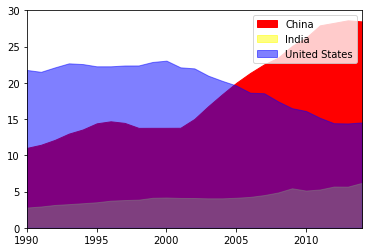

In [5]:
# plot the world percentage of those countries
world_column = 'World'
world =  [float(row[world_column]) for row in data_sorted_by_year]

china_percent = [c/w * 100 for c, w in zip(china,world)]
india_percent = [i/w * 100 for i,w in zip(india,world)]
usa_percent = [u/w * 100 for u, w in zip(usa,world)]

fig, ax = plt.subplots()
#plt.plot(year, china_percent, 'r', year, usa_percent,'b')
plt.ylim(0,30)
plt.xlim(1990,2014)
ax.fill_between(year, 0, china_percent, color='red')
ax.fill_between(year,0,india_percent,color='yellow', alpha=0.5)
ax.fill_between(year,0,usa_percent,color='blue',alpha=0.5)

plt.legend(['China','India','United States'])

This cell shows an alternative way of plotting the area chart by stacking the lines. 
For simplicity, we only show data of two countries  

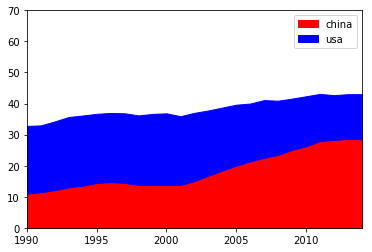

In [6]:
# stacked area plot:
usa_and_china_percent =[c+u for c, u in zip(china_percent,usa_percent)]
fig, ax = plt.subplots()
plt.ylim([0,70])
plt.xlim(1990,2014)
ax.fill_between(year, 0, china_percent, color='red')
ax.fill_between(year,china_percent,usa_and_china_percent,color='blue')
plt.legend(['china','usa'])